In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
soi = """YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC    
1951   2.5   1.5  -0.2  -0.5  -1.1   0.3  -1.7  -0.4  -1.8  -1.6  -1.3  -1.2
1952  -1.5  -1.0   0.9  -0.4   1.2   1.2   0.8   0.1  -0.4   0.6   0.0  -2.0
1953   0.5  -0.8  -0.3   0.3  -2.8   0.2  -0.0  -2.0  -2.1   0.1  -0.5  -0.8
1954   1.1  -0.5   0.4   1.1   0.8   0.2   0.7   1.8   0.3   0.4   0.2   2.3
1955  -0.9   3.1   1.1  -0.2   1.7   2.2   2.6   2.4   2.2   2.5   2.0   1.6
1956   2.2   2.7   2.2   1.5   2.3   1.8   1.8   2.0   0.1   2.9   0.2   1.8
1957   1.0  -0.1   0.3   0.4  -1.1   0.3   0.4  -0.8  -1.5   0.1  -1.6  -0.5
1958  -3.1  -0.8   0.4   0.6  -0.8   0.5   0.7   1.5  -0.5   0.1  -0.7  -1.0
1959  -1.5  -2.3   2.1   0.7   0.8  -0.2  -0.4  -0.2   0.0   0.8   1.5   1.5
1960   0.2   0.2   1.7   1.3   0.9   0.2   0.8   1.3   1.1   0.2   0.9   1.3
1961  -0.4   1.5  -3.0   1.3   0.5   0.2   0.4   0.2   0.1  -0.5   0.9   2.5
1962   3.3  -0.5   0.2   0.3   1.8   1.2   0.1   1.0   0.7   1.6   0.5   0.3
1963   1.7   0.9   1.9   1.3   0.6  -0.8  -0.2   0.0  -1.0  -2.0  -1.4  -2.0
1964  -0.6   0.1   1.9   1.8   0.4   1.2   0.9   2.5   2.1   2.2   0.3  -0.5
1965  -0.7   0.7   1.2  -0.9   0.3  -0.9  -3.0  -1.1  -2.2  -1.5  -2.4   0.3
1966  -2.2  -0.4  -1.5  -0.3  -0.7   0.5   0.1   1.1  -0.4  -0.2  -0.0  -0.6
1967   2.8   2.8   2.0  -0.1  -0.0   1.1   0.3   1.2   0.8   0.1  -0.7  -0.9
1968   0.9   2.1   0.2   0.0   2.1   1.8   1.1   0.4  -0.4  -0.1  -0.6   0.3
1969  -2.4  -0.9   0.7  -0.6  -0.4   0.3  -0.8  -0.2  -1.6  -1.5  -0.1   0.7
1970  -1.9  -1.7   1.0  -0.1   0.6   1.6  -0.6   1.0   1.9   1.7   2.6   3.2
1971   0.6   3.3   3.8   2.8   1.4   0.7   0.4   2.5   2.3   2.8   0.9   0.4
1972   0.8   1.8   1.1  -0.2  -2.6  -0.9  -2.4  -0.8  -2.2  -1.5  -0.6  -2.1
1973  -0.5  -2.3   1.2   0.1   0.7   1.8   1.0   2.1   2.0   1.3   4.3   3.0
1974   4.0   3.4   4.0   1.6   1.6   0.7   1.9   1.3   1.8   1.5  -0.2   0.3
1975  -0.8   1.3   2.6   1.9   1.1   2.1   3.1   3.3   3.4   2.8   1.9   3.5
1976   2.3   2.8   2.9   0.5   0.6   0.4  -1.4  -1.3  -1.9   0.7   1.2  -0.6
1977  -0.7   2.0  -0.9  -0.7  -0.8  -1.5  -1.9  -1.3  -1.3  -1.7  -2.1  -1.7
1978  -0.5  -4.4  -0.3  -0.5   2.2   1.1   0.9   0.7   0.1  -0.6  -0.0  -0.1
1979  -0.7   1.6   0.2  -0.2   0.8   1.1   2.2  -0.3   0.2  -0.2  -0.7  -1.2
1980   0.7   0.5  -0.7  -1.0  -0.0  -0.0  -0.1   0.6  -0.8   0.0  -0.6  -0.1
1981   0.6  -0.3  -2.1  -0.2   1.3   2.0   1.4   1.2   0.5  -0.6   0.3   0.8
1982   2.0   0.4   1.0   0.1  -0.6  -1.7  -2.5  -2.9  -2.9  -2.8  -4.3  -3.7
1983  -5.8  -6.0  -4.0  -1.5   1.0   0.1  -1.0   0.2   1.4   0.7  -0.2   0.0
1984   0.3   1.4  -0.4   0.6   0.3  -0.6   0.3   0.7   0.2  -0.5   0.4  -0.2
1985  -0.5   2.0   1.3   1.9   0.7  -0.6  -0.2   1.6   0.0  -0.6  -0.3   0.4
1986   1.6  -1.7   0.8   0.5  -0.4   1.6   0.5  -0.6  -0.8   1.1  -2.0  -2.4
1987  -1.1  -2.1  -2.1  -2.3  -2.1  -1.8  -2.2  -1.5  -1.7  -0.6  -0.0  -0.8
1988  -0.2  -0.6   1.1   0.2   1.5   0.1   1.7   2.5   3.0   2.3   2.8   2.0
1989   2.5   2.0   1.8   2.7   2.0   1.2   1.5  -0.5   0.8   1.3  -0.4  -0.9
1990  -0.1  -3.0  -0.7   0.3   2.0   0.5   0.9  -0.3  -1.2   0.4  -0.8  -0.4
1991   1.0   0.4  -1.1  -1.0  -1.7  -0.2   0.0  -0.7  -2.5  -1.7  -1.1  -2.9
1992  -4.7  -1.5  -3.3  -1.7   0.4  -1.0  -1.0   0.6   0.1  -2.3  -1.1  -0.9
1993  -1.5  -1.2  -0.8  -1.9  -0.6  -1.4  -1.3  -1.6  -1.2  -1.8  -0.1   0.3
1994  -0.2   0.4  -1.1  -2.1  -1.1  -0.7  -2.2  -2.0  -2.6  -1.9  -0.9  -2.0
1995  -0.7  -0.2   1.2  -1.1  -0.6   0.2   0.7   0.5   0.4   0.0   0.1  -0.8
1996   1.6   0.4   1.9   1.3   0.5   1.9   1.1   1.2   1.0   1.0  -0.1   1.5
1997   0.8   2.9  -0.7  -1.0  -2.2  -2.3  -1.2  -2.4  -2.4  -2.4  -2.0  -1.6
1998  -4.4  -3.4  -4.0  -2.4   0.4   1.6   2.0   1.9   1.7   1.8   1.7   2.3
1999   3.0   1.6   2.1   2.3   0.4   0.4   0.9   0.6  -0.1   1.6   1.7   2.4
2000   1.1   2.7   2.2   2.0   0.6  -0.3  -0.3   1.2   1.4   1.8   3.0   1.3
2001   1.6   2.8   1.5   0.3  -0.8   0.5  -0.3  -0.7   0.3  -0.1   1.1  -1.4
2002   0.7   1.8  -0.4  -0.1  -1.4  -0.4  -0.8  -1.6  -1.0  -0.6  -0.7  -1.8
2003  -0.3  -1.1  -0.5  -0.2  -0.5  -1.0   0.5   0.2  -0.2   0.0  -0.5   1.8
2004  -2.2   2.0   0.7  -1.5   1.7  -1.4  -0.8  -0.5  -0.6  -0.1  -1.1  -1.3
2005   0.6  -5.2   0.5  -1.0  -1.3   0.7   0.3  -0.6   0.6   2.0  -0.3  -0.0
2006   2.7   0.2   2.9   1.8  -0.8  -0.4  -1.0  -1.7  -1.0  -2.1   0.1  -0.5
2007  -1.3  -0.1   0.3  -0.2  -0.2   0.9  -0.5   0.7   0.3   1.2   1.4   2.7
2008   2.9   4.4   2.4   1.1  -0.1   1.0   0.5   1.7   2.0   2.1   2.2   2.4
2009   1.8   3.1   0.7   1.3  -0.2   0.2   0.4  -0.3   0.5  -2.0  -1.0  -1.2
2010  -1.8  -2.4  -1.1   2.0   1.5   0.6   3.0   3.0   3.7   2.9   2.1   4.8
2011   3.8   4.5   4.2   3.1   0.6   0.4   1.6   0.7   1.7   1.2   1.8   4.1
2012   1.8   0.8   1.2  -0.4   0.1  -0.7  -0.1  -0.3   0.4   0.5   0.4  -1.0
2013  -0.1  -0.4   2.5   0.4   1.3   2.0   1.3   0.3   0.5  -0.1   1.2   0.1
2014   2.4   0.1  -1.5   1.3   0.9   0.3  -0.3  -1.2  -1.2  -1.0  -1.5  -0.9
2015  -1.4   0.4  -1.2  -0.1  -1.2  -0.9  -1.9  -2.4  -2.7  -2.8  -0.8  -0.9
2016  -3.6  -3.2  -0.1  -2.0   0.7   1.1   0.7   1.2   2.0  -0.4  -0.2   0.5
2017   0.3  -0.1   1.5  -0.3   0.4  -0.7   1.3   0.9   1.0   1.5   1.5  -0.2
2018   1.8  -0.8   2.4   0.8   0.6  -0.2   0.4  -0.5  -1.5   0.6  -0.1   1.7
2019  -0.1  -2.3  -0.5   0.2  -0.7  -0.7  -0.6  -0.2  -1.9  -0.6  -1.4  -0.9
2020   0.3  -0.1  -0.2   0.3   0.7  -0.6   0.7   1.8   1.5   0.8   1.1   3.0
2021   3.2   2.5   0.6   0.6   0.8   0.7   2.3   1.0   1.3   1.2   1.6   2.5
2022   0.8   1.8   2.9   2.8   2.4   2.8   1.3   1.7   2.7   2.8   0.5   3.5
2023   2.3   2.3   0.3   0.4"""

In [3]:
def getDataSoi(string) :
    string = string.replace('NO3.4', 'NO34')
    data = []
    while string.find('.')!=-1 :
        loc = string.find('.')
        num = string[loc-3:loc+2]
        num.replace(' ','')
        string = string.replace('.','',1)
        data.append(float(num))
    return data

In [4]:
dfSOI = pd.DataFrame(getDataSoi(soi))
start = pd.to_datetime('1951-01-01')
end = pd.to_datetime('2023-05-01')
date_range = pd.date_range(start=start, end=end, freq='M')
dfSOI.index = date_range
dfSOI = dfSOI.rename(columns={0:'soi'})
dfSOI

,soi
1951-01-31,2.5
1951-02-28,1.5
1951-03-31,-0.2
1951-04-30,-0.5
1951-05-31,-1.1
...,...
2022-12-31,3.5
2023-01-31,2.3
2023-02-28,2.3
2023-03-31,0.3


In [5]:
sst = """YR MON  NINO1+2   ANOM   NINO3    ANOM   NINO4    ANOM NINO3.4    ANOM
1982   1   24.28   -0.24   25.84    0.17   28.01   -0.21   26.65    0.08
1982   2   25.38   -0.72   26.26   -0.11   27.99   -0.11   26.54   -0.20
1982   3   25.22   -1.38   26.92   -0.25   28.18   -0.05   27.09   -0.14
1982   4   24.57   -1.16   27.52   -0.05   28.61    0.10   27.83    0.02
1982   5   24.00   -0.62   27.70    0.49   29.19    0.40   28.37    0.49
1982   6   22.88   -0.29   27.10    0.46   29.46    0.62   28.35    0.65
1982   7   22.07    0.24   26.14    0.27   28.76   -0.02   27.57    0.27
1982   8   21.71    0.85   26.05    0.83   28.70    0.01   27.76    0.86
1982   9   21.91    1.33   26.50    1.49   28.91    0.24   28.01    1.24
1982  10   22.67    1.80   27.04    1.96   29.11    0.43   28.50    1.73
1982  11   24.40    2.78   27.39    2.19   28.85    0.18   28.50    1.68
1982  12   25.73    2.89   28.07    2.80   28.81    0.36   28.85    2.21
1983   1   26.82    2.30   28.37    2.69   28.63    0.41   28.70    2.13
1983   2   27.65    1.55   28.39    2.01   28.51    0.41   28.54    1.81
1983   3   28.34    1.73   28.48    1.32   28.59    0.37   28.45    1.22
1983   4   28.10    2.37   28.76    1.19   28.49   -0.02   28.49    0.68
1983   5   27.87    3.26   28.64    1.43   28.97    0.18   28.56    0.68
1983   6   27.20    4.03   28.09    1.45   28.78   -0.06   28.16    0.45
1983   7   25.69    3.85   26.56    0.68   28.46   -0.32   26.97   -0.33
1983   8   23.73    2.88   25.77    0.55   28.20   -0.49   26.46   -0.44
1983   9   22.16    1.58   25.21    0.20   28.06   -0.62   26.38   -0.38
1983  10   21.98    1.11   24.56   -0.52   27.67   -1.02   25.75   -1.02
1983  11   22.01    0.38   24.16   -1.03   27.67   -1.01   25.53   -1.29
1983  12   22.95    0.11   24.39   -0.88   27.48   -0.97   25.49   -1.16
1984   1   24.35   -0.16   24.80   -0.87   27.41   -0.81   25.60   -0.96
1984   2   25.23   -0.87   26.41    0.03   27.26   -0.84   26.57   -0.16
1984   3   25.72   -0.88   26.88   -0.28   27.32   -0.91   26.71   -0.52
1984   4   25.28   -0.45   27.28   -0.29   27.54   -0.97   27.27   -0.54
1984   5   23.44   -1.17   26.38   -0.84   27.94   -0.85   27.19   -0.69
1984   6   22.21   -0.97   25.36   -1.29   28.04   -0.81   26.68   -1.03
1984   7   21.15   -0.69   25.04   -0.83   28.34   -0.45   26.62   -0.68
1984   8   20.28   -0.57   24.64   -0.58   28.04   -0.65   26.36   -0.54
1984   9   20.20   -0.38   24.72   -0.29   28.22   -0.45   26.35   -0.41
1984  10   20.45   -0.43   24.18   -0.90   28.02   -0.67   26.02   -0.75
1984  11   21.42   -0.21   24.15   -1.05   27.92   -0.75   25.52   -1.30
1984  12   22.62   -0.21   23.89   -1.37   27.45   -1.00   25.16   -1.48
1985   1   23.59   -0.93   24.28   -1.39   27.39   -0.83   25.26   -1.30
1985   2   24.79   -1.30   25.24   -1.14   27.53   -0.57   25.81   -0.92
1985   3   25.66   -0.95   26.21   -0.96   27.23   -0.99   26.35   -0.89
1985   4   24.30   -1.43   26.64   -0.94   27.42   -1.09   26.71   -1.10
1985   5   22.72   -1.89   25.99   -1.22   27.71   -1.08   26.81   -1.08
1985   6   21.83   -1.35   25.45   -1.19   27.88   -0.96   26.63   -1.08
1985   7   20.46   -1.37   24.73   -1.14   28.05   -0.74   26.50   -0.80
1985   8   19.60   -1.26   24.24   -0.98   28.09   -0.60   26.27   -0.63
1985   9   19.23   -1.35   24.04   -0.97   28.08   -0.60   25.99   -0.77
1985  10   19.76   -1.11   24.11   -0.98   28.11   -0.57   26.03   -0.74
1985  11   20.83   -0.79   24.29   -0.91   28.30   -0.37   26.23   -0.59
1985  12   22.34   -0.50   24.39   -0.88   28.10   -0.34   26.05   -0.59
1986   1   24.50   -0.02   24.80   -0.87   27.70   -0.52   25.84   -0.72
1986   2   25.88   -0.22   25.80   -0.58   27.73   -0.37   25.95   -0.78
1986   3   25.91   -0.69   26.74   -0.42   27.94   -0.29   26.64   -0.60
1986   4   24.82   -0.91   27.04   -0.53   27.83   -0.68   27.29   -0.52
1986   5   23.34   -1.27   26.44   -0.77   28.35   -0.44   27.32   -0.56
1986   6   22.16   -1.02   26.15   -0.49   28.60   -0.24   27.38   -0.33
1986   7   21.22   -0.61   25.78   -0.09   28.50   -0.29   27.26   -0.04
1986   8   20.72   -0.14   25.12   -0.10   28.68   -0.01   27.09    0.19
1986   9   20.47   -0.11   25.30    0.29   28.83    0.15   27.16    0.40
1986  10   21.00    0.12   25.43    0.34   28.91    0.23   27.28    0.51
1986  11   21.62   -0.01   25.74    0.54   28.97    0.30   27.36    0.54
1986  12   22.96    0.12   25.86    0.60   28.64    0.19   27.47    0.82
1987   1   25.06    0.54   26.48    0.81   28.48    0.26   27.51    0.94
1987   2   26.75    0.66   27.16    0.78   28.41    0.31   27.55    0.82
1987   3   27.54    0.94   27.96    0.80   28.70    0.47   28.12    0.89
1987   4   26.60    0.87   28.14    0.57   28.77    0.26   28.25    0.45
1987   5   25.45    0.84   27.83    0.62   28.85    0.06   28.20    0.32
1987   6   23.83    0.66   27.15    0.51   29.18    0.34   28.42    0.72
1987   7   22.53    0.70   26.87    0.99   29.08    0.29   28.34    1.04
1987   8   21.58    0.72   26.28    1.06   29.04    0.35   28.10    1.20
1987   9   21.29    0.71   26.38    1.37   29.01    0.33   28.08    1.32
1987  10   22.17    1.29   25.96    0.88   29.31    0.63   27.74    0.97
1987  11   22.55    0.93   25.93    0.73   29.31    0.63   27.67    0.85
1987  12   23.28    0.44   26.17    0.91   28.96    0.51   27.41    0.77
1988   1   24.33   -0.19   26.20    0.53   28.72    0.50   27.23    0.67
1988   2   25.68   -0.42   26.35   -0.03   28.40    0.31   26.95    0.22
1988   3   25.75   -0.85   27.07   -0.10   28.15   -0.07   27.29    0.06
1988   4   24.66   -1.07   26.81   -0.76   27.91   -0.60   27.26   -0.55
1988   5   23.48   -1.13   25.54   -1.67   28.07   -0.72   26.56   -1.32
1988   6   21.58   -1.59   24.48   -2.16   27.89   -0.95   26.01   -1.70
1988   7   20.23   -1.60   23.79   -2.08   27.79   -1.00   25.57   -1.73
1988   8   19.19   -1.66   23.62   -1.60   27.70   -0.99   25.47   -1.43
1988   9   19.06   -1.52   24.07   -0.94   27.91   -0.77   25.83   -0.93
1988  10   19.35   -1.53   23.51   -1.58   26.93   -1.75   24.76   -2.01
1988  11   20.41   -1.22   23.38   -1.82   26.81   -1.87   24.60   -2.22
1988  12   21.67   -1.17   23.44   -1.82   26.67   -1.78   24.63   -2.01
1989   1   24.04   -0.48   24.23   -1.45   26.36   -1.86   24.56   -2.00
1989   2   25.86   -0.23   25.42   -0.96   26.63   -1.46   25.26   -1.48
1989   3   26.60    0.00   25.93   -1.23   26.97   -1.26   25.80   -1.44
1989   4   25.60   -0.13   26.51   -1.06   27.41   -1.10   26.49   -1.32
1989   5   23.36   -1.25   26.31   -0.90   28.10   -0.69   26.99   -0.89
1989   6   22.03   -1.15   26.25   -0.39   27.79   -1.05   27.03   -0.67
1989   7   21.14   -0.70   25.35   -0.52   27.96   -0.83   26.73   -0.57
1989   8   20.35   -0.51   24.57   -0.65   27.79   -0.91   26.18   -0.72
1989   9   19.70   -0.88   24.61   -0.40   28.13   -0.54   26.25   -0.51
1989  10   20.20   -0.68   24.52   -0.57   28.14   -0.54   26.22   -0.55
1989  11   21.19   -0.43   24.50   -0.70   27.91   -0.76   26.21   -0.62
1989  12   22.26   -0.58   24.76   -0.50   28.30   -0.15   26.44   -0.20
1990   1   23.92   -0.60   25.27   -0.40   28.20   -0.02   26.45   -0.11
1990   2   25.66   -0.43   26.27   -0.11   28.27    0.18   26.74    0.01
1990   3   26.10   -0.50   26.67   -0.50   28.36    0.13   27.05   -0.18
1990   4   25.03   -0.70   27.36   -0.21   28.67    0.16   27.74   -0.06
1990   5   24.00   -0.61   27.24    0.03   28.64   -0.15   27.92    0.04
1990   6   22.77   -0.40   26.46   -0.18   28.64   -0.20   27.44   -0.26
1990   7   20.93   -0.90   25.72   -0.15   28.68   -0.11   27.27   -0.03
1990   8   20.39   -0.47   25.16   -0.06   28.83    0.14   26.99    0.09
1990   9   19.98   -0.60   25.00   -0.01   28.76    0.08   26.73   -0.03
1990  10   20.08   -0.79   24.91   -0.17   28.96    0.28   26.95    0.18
1990  11   20.73   -0.90   24.84   -0.36   28.82    0.15   26.73   -0.09
1990  12   22.12   -0.72   25.18   -0.08   28.84    0.39   26.86    0.22
1991   1   23.73   -0.78   25.63   -0.05   28.62    0.40   26.89    0.33
1991   2   25.70   -0.40   26.28   -0.10   28.40    0.30   26.87    0.14
1991   3   26.32   -0.28   26.96   -0.20   28.38    0.15   27.16   -0.08
1991   4   25.21   -0.52   27.39   -0.19   28.73    0.22   27.89    0.08
1991   5   24.65    0.04   27.44    0.22   29.18    0.39   28.13    0.25
1991   6   23.07   -0.11   27.23    0.58   29.05    0.21   28.10    0.39
1991   7   22.06    0.23   26.43    0.56   28.95    0.17   27.77    0.47
1991   8   20.98    0.12   25.55    0.33   29.07    0.38   27.50    0.60
1991   9   20.72    0.14   25.12    0.11   28.85    0.17   27.07    0.31
1991  10   21.09    0.22   25.36    0.27   29.31    0.63   27.41    0.64
1991  11   21.92    0.29   25.93    0.73   29.12    0.44   27.71    0.89
1991  12   23.13    0.29   26.30    1.03   29.21    0.77   28.14    1.50
1992   1   24.59    0.07   26.86    1.18   28.80    0.58   28.23    1.67
1992   2   26.25    0.15   27.34    0.96   28.76    0.67   28.28    1.55
1992   3   27.38    0.78   27.87    0.71   28.83    0.60   28.39    1.16
1992   4   27.17    1.44   28.46    0.89   29.03    0.52   28.81    1.00
1992   5   26.09    1.47   28.28    1.07   29.12    0.33   28.79    0.91
1992   6   23.66    0.48   27.12    0.47   29.01    0.17   28.12    0.42
1992   7   21.44   -0.39   25.65   -0.22   29.12    0.33   27.45    0.15
1992   8   20.67   -0.18   24.98   -0.24   28.65   -0.04   26.82   -0.08
1992   9   20.37   -0.21   24.82   -0.19   28.65   -0.03   26.60   -0.16
1992  10   20.99    0.12   24.66   -0.42   28.45   -0.24   26.27   -0.50
1992  11   21.37   -0.26   24.97   -0.23   28.37   -0.30   26.64   -0.18
1992  12   22.41   -0.43   25.10   -0.17   28.48    0.03   26.78    0.14
1993   1   24.25   -0.27   25.66   -0.01   28.32    0.09   26.73    0.16
1993   2   26.12    0.03   26.69    0.31   28.10    0.00   27.07    0.34
1993   3   26.84    0.23   27.38    0.22   28.29    0.07   27.46    0.23
1993   4   26.23    0.50   28.02    0.44   28.51    0.00   28.13    0.32
1993   5   25.16    0.54   28.05    0.84   28.79   -0.00   28.53    0.65
1993   6   23.53    0.36   26.82    0.18   28.76   -0.08   27.86    0.15
1993   7   22.06    0.23   26.04    0.17   28.80    0.02   27.51    0.22
1993   8   20.98    0.13   25.25    0.03   28.67   -0.02   26.86   -0.04
1993   9   20.88    0.30   25.16    0.15   28.83    0.16   27.00    0.24
1993  10   21.19    0.32   25.28    0.20   28.66   -0.02   26.96    0.19
1993  11   21.64    0.01   25.21    0.01   28.76    0.08   26.90    0.08
1993  12   22.46   -0.37   25.25   -0.02   28.74    0.29   26.74    0.10
1994   1   24.31   -0.20   25.75    0.08   28.31    0.09   26.58    0.02
1994   2   25.76   -0.34   26.19   -0.19   27.89   -0.20   26.65   -0.08
1994   3   25.54   -1.06   26.86   -0.30   28.28    0.06   27.38    0.15
1994   4   24.51   -1.22   27.01   -0.56   28.40   -0.11   27.88    0.08
1994   5   23.52   -1.10   26.95   -0.26   28.98    0.19   28.00    0.12
1994   6   22.42   -0.75   26.42   -0.23   29.03    0.19   27.84    0.13
1994   7   21.22   -0.61   25.26   -0.61   29.25    0.47   27.29   -0.01
1994   8   19.89   -0.96   24.87   -0.35   29.31    0.61   27.30    0.40
1994   9   20.06   -0.52   24.90   -0.11   29.05    0.38   27.04    0.28
1994  10   21.56    0.69   25.58    0.49   29.19    0.50   27.37    0.60
1994  11   22.26    0.63   25.93    0.73   29.25    0.58   27.73    0.91
1994  12   23.46    0.62   26.07    0.80   29.16    0.71   27.79    1.15
1995   1   25.04    0.52   26.17    0.50   28.76    0.54   27.32    0.75
1995   2   26.17    0.07   26.75    0.37   28.80    0.71   27.37    0.64
1995   3   26.30   -0.30   26.97   -0.20   28.81    0.59   27.53    0.30
1995   4   24.65   -1.08   27.00   -0.57   28.88    0.36   27.87    0.07
1995   5   23.37   -1.24   26.40   -0.82   29.05    0.26   27.67   -0.21
1995   6   22.44   -0.73   26.03   -0.61   28.90    0.06   27.35   -0.36
1995   7   21.34   -0.50   25.51   -0.36   28.71   -0.08   27.09   -0.21
1995   8   20.14   -0.71   24.44   -0.78   28.48   -0.21   26.33   -0.57
1995   9   20.23   -0.35   24.16   -0.85   28.36   -0.32   26.10   -0.66
1995  10   20.05   -0.82   24.18   -0.90   28.11   -0.57   25.82   -0.94
1995  11   21.53   -0.10   24.18   -1.01   28.05   -0.63   25.81   -1.01
1995  12   21.97   -0.86   24.31   -0.96   27.96   -0.48   25.73   -0.91
1996   1   23.83   -0.69   24.96   -0.71   27.75   -0.48   25.74   -0.83
1996   2   25.60   -0.49   25.72   -0.66   27.48   -0.62   25.96   -0.77
1996   3   26.15   -0.45   26.66   -0.50   27.62   -0.61   26.58   -0.66
1996   4   24.09   -1.64   26.63   -0.94   28.01   -0.50   27.32   -0.49
1996   5   23.28   -1.34   26.36   -0.85   28.41   -0.38   27.37   -0.51
1996   6   21.86   -1.31   25.87   -0.78   28.45   -0.39   27.23   -0.48
1996   7   20.49   -1.34   25.22   -0.65   28.37   -0.42   26.93   -0.37
1996   8   19.75   -1.11   24.68   -0.54   28.44   -0.26   26.59   -0.31
1996   9   19.50   -1.08   24.46   -0.55   28.36   -0.32   26.41   -0.35
1996  10   20.14   -0.73   24.40   -0.68   28.34   -0.35   26.22   -0.55
1996  11   20.34   -1.29   24.56   -0.64   28.24   -0.43   26.39   -0.43
1996  12   21.67   -1.16   24.20   -1.06   28.31   -0.14   26.04   -0.60
1997   1   23.58   -0.93   24.69   -0.98   28.12   -0.10   25.95   -0.61
1997   2   25.64   -0.45   25.66   -0.72   28.22    0.12   26.34   -0.39
1997   3   26.83    0.23   26.73   -0.44   28.35    0.13   26.88   -0.36
1997   4   26.53    0.80   27.26   -0.31   29.00    0.48   27.70   -0.11
1997   5   26.44    1.83   27.67    0.46   29.21    0.42   28.28    0.40
1997   6   25.97    2.79   27.85    1.21   29.04    0.20   28.52    0.81
1997   7   25.42    3.59   27.65    1.77   29.19    0.40   28.57    1.27
1997   8   24.57    3.71   27.54    2.32   29.03    0.33   28.58    1.68
1997   9   24.21    3.63   27.53    2.52   29.23    0.56   28.60    1.84
1997  10   24.44    3.57   27.78    2.69   28.99    0.30   28.73    1.96
1997  11   25.36    3.73   28.23    3.04   29.29    0.61   28.93    2.11
1997  12   26.57    3.73   28.33    3.07   28.89    0.44   28.74    2.10
1998   1   27.40    2.88   28.42    2.75   28.67    0.44   28.59    2.03
1998   2   28.01    1.91   28.57    2.19   28.62    0.52   28.47    1.74
1998   3   28.51    1.91   28.81    1.64   28.49    0.27   28.42    1.18
1998   4   28.07    2.34   28.77    1.20   28.39   -0.12   28.30    0.50
1998   5   27.46    2.84   28.27    1.06   28.56   -0.23   28.33    0.45
1998   6   25.09    1.92   26.37   -0.27   28.36   -0.48   26.96   -0.75
1998   7   23.47    1.64   25.49   -0.38   28.02   -0.77   26.15   -1.15
1998   8   21.98    1.12   24.78   -0.43   27.79   -0.90   25.70   -1.20
1998   9   21.11    0.53   24.38   -0.63   27.91   -0.77   25.73   -1.03
1998  10   21.66    0.79   24.18   -0.91   27.27   -1.41   25.43   -1.34
1998  11   21.45   -0.17   24.47   -0.73   27.24   -1.43   25.51   -1.31
1998  12   23.08    0.24   24.12   -1.15   26.96   -1.48   24.91   -1.73
1999   1   23.82   -0.69   24.52   -1.15   26.55   -1.67   24.98   -1.58
1999   2   25.67   -0.42   25.64   -0.74   26.62   -1.48   25.63   -1.10
1999   3   26.61    0.01   26.82   -0.35   26.89   -1.34   26.34   -0.89
1999   4   24.21   -1.52   26.74   -0.83   27.22   -1.29   26.81   -0.99
1999   5   23.79   -0.82   26.57   -0.64   27.80   -0.99   26.96   -0.92
1999   6   22.35   -0.83   25.84   -0.80   27.96   -0.89   26.62   -1.08
1999   7   21.04   -0.79   25.01   -0.87   27.70   -1.09   26.27   -1.03
1999   8   20.03   -0.83   24.26   -0.96   27.74   -0.95   25.68   -1.22
1999   9   19.64   -0.94   23.89   -1.12   27.77   -0.91   25.73   -1.03
1999  10   20.13   -0.74   23.75   -1.34   27.84   -0.85   25.58   -1.19
1999  11   20.66   -0.96   23.63   -1.57   27.54   -1.13   25.19   -1.63
1999  12   22.17   -0.67   23.68   -1.59   27.21   -1.23   24.99   -1.65
2000   1   23.93   -0.59   24.00   -1.67   27.02   -1.20   24.80   -1.77
2000   2   25.71   -0.39   25.38   -1.00   26.69   -1.41   25.21   -1.52
2000   3   25.88   -0.72   26.56   -0.61   26.73   -1.49   26.11   -1.13
2000   4   25.94    0.21   27.38   -0.19   27.29   -1.22   26.91   -0.90
2000   5   23.97   -0.64   26.66   -0.56   27.65   -1.14   26.91   -0.97
2000   6   22.69   -0.49   25.91   -0.73   28.30   -0.55   27.01   -0.70
2000   7   20.78   -1.05   25.07   -0.80   28.21   -0.57   26.57   -0.73
2000   8   19.85   -1.01   24.64   -0.58   28.14   -0.55   26.39   -0.51
2000   9   20.01   -0.57   24.55   -0.46   28.34   -0.33   26.24   -0.52
2000  10   20.38   -0.50   24.51   -0.57   28.02   -0.66   26.06   -0.71
2000  11   20.65   -0.97   24.29   -0.91   28.00   -0.67   25.92   -0.90
2000  12   22.43   -0.41   24.55   -0.72   27.29   -1.16   25.59   -1.05
2001   1   24.15   -0.37   25.25   -0.43   27.31   -0.91   25.81   -0.76
2001   2   25.71   -0.38   26.17   -0.21   27.10   -0.99   26.18   -0.56
2001   3   26.94    0.34   27.27    0.10   27.50   -0.73   26.86   -0.37
2001   4   26.26    0.53   27.35   -0.22   27.91   -0.60   27.24   -0.56
2001   5   24.26   -0.35   26.99   -0.22   28.38   -0.41   27.42   -0.46
2001   6   22.49   -0.69   26.42   -0.23   28.58   -0.27   27.55   -0.16
2001   7   21.25   -0.58   25.50   -0.37   28.94    0.15   27.19   -0.11
2001   8   20.31   -0.55   24.86   -0.35   28.77    0.07   26.81   -0.09
2001   9   19.81   -0.77   24.51   -0.50   29.06    0.39   26.58   -0.19
2001  10   19.80   -1.07   24.62   -0.47   28.87    0.19   26.52   -0.25
2001  11   20.77   -0.85   24.35   -0.84   28.79    0.12   26.35   -0.48
2001  12   22.19   -0.64   24.68   -0.59   28.36   -0.09   26.11   -0.53
2002   1   23.94   -0.58   25.02   -0.65   28.60    0.38   26.36   -0.20
2002   2   26.02   -0.07   26.03   -0.34   28.42    0.32   26.76    0.03
2002   3   27.29    0.69   27.22    0.06   28.29    0.06   27.17   -0.06
2002   4   26.39    0.66   27.45   -0.12   28.88    0.37   27.84    0.03
2002   5   25.35    0.74   27.38    0.16   29.29    0.50   28.07    0.19
2002   6   23.30    0.12   27.13    0.48   29.34    0.50   28.31    0.60
2002   7   21.86    0.02   26.17    0.30   29.24    0.46   27.88    0.58
2002   8   20.71   -0.15   25.53    0.31   29.23    0.54   27.56    0.66
2002   9   20.80    0.22   25.68    0.67   29.24    0.56   27.61    0.85
2002  10   21.64    0.77   25.75    0.66   29.25    0.57   27.79    1.02
2002  11   22.81    1.19   26.29    1.09   29.50    0.83   28.03    1.20
2002  12   23.73    0.89   26.42    1.15   29.28    0.83   27.94    1.30
2003   1   24.47   -0.05   26.34    0.67   28.86    0.64   27.45    0.88
2003   2   26.14    0.04   26.78    0.40   28.71    0.61   27.39    0.65
2003   3   26.66    0.06   27.31    0.15   28.83    0.61   27.73    0.50
2003   4   24.96   -0.77   27.21   -0.36   28.67    0.16   27.67   -0.14
2003   5   22.87   -1.74   26.30   -0.91   28.59   -0.20   27.28   -0.60
2003   6   22.23   -0.95   26.06   -0.59   28.86    0.02   27.37   -0.34
2003   7   21.39   -0.44   25.85   -0.02   28.93    0.14   27.34    0.04
2003   8   21.04    0.18   25.38    0.16   28.83    0.14   26.94    0.04
2003   9   20.31   -0.27   25.11    0.10   28.81    0.14   26.94    0.18
2003  10   21.14    0.27   25.50    0.42   29.12    0.44   27.19    0.42
2003  11   22.07    0.44   25.52    0.32   29.08    0.41   27.03    0.21
2003  12   23.31    0.47   25.94    0.68   28.75    0.30   26.98    0.34
2004   1   24.79    0.28   26.14    0.47   28.54    0.31   26.78    0.22
2004   2   26.22    0.12   26.64    0.26   28.37    0.27   26.90    0.16
2004   3   25.82   -0.78   27.11   -0.05   28.30    0.08   27.05   -0.18
2004   4   25.71   -0.02   27.42   -0.15   28.58    0.06   27.76   -0.04
2004   5   23.65   -0.97   26.77   -0.44   28.95    0.15   27.95    0.07
2004   6   22.24   -0.94   26.40   -0.24   28.91    0.07   27.70   -0.00
2004   7   21.08   -0.75   25.91    0.04   29.14    0.35   27.76    0.47
2004   8   20.23   -0.63   25.31    0.09   29.10    0.40   27.51    0.61
2004   9   20.25   -0.33   25.27    0.26   29.32    0.65   27.43    0.67
2004  10   21.21    0.34   25.50    0.41   29.35    0.67   27.41    0.64
2004  11   22.51    0.89   25.75    0.55   29.31    0.64   27.41    0.59
2004  12   22.99    0.15   25.83    0.56   29.13    0.68   27.28    0.63
2005   1   24.64    0.13   25.96    0.28   29.11    0.89   27.18    0.61
2005   2   25.52   -0.58   26.25   -0.13   28.71    0.61   26.97    0.24
2005   3   25.23   -1.37   26.93   -0.23   28.74    0.51   27.50    0.27
2005   4   25.12   -0.61   27.57   -0.00   28.80    0.29   27.93    0.13
2005   5   24.58   -0.04   27.40    0.19   29.00    0.21   28.10    0.22
2005   6   22.51   -0.67   26.76    0.11   29.07    0.23   27.91    0.20
2005   7   21.43   -0.40   25.98    0.11   28.92    0.13   27.37    0.08
2005   8   20.29   -0.57   25.44    0.22   28.71    0.02   26.96    0.06
2005   9   19.90   -0.68   24.80   -0.21   28.64   -0.04   26.64   -0.12
2005  10   19.76   -1.11   24.77   -0.32   28.74    0.06   26.70   -0.07
2005  11   20.36   -1.27   24.22   -0.98   28.56   -0.12   26.29   -0.54
2005  12   22.12   -0.71   24.05   -1.21   28.26   -0.18   25.84   -0.80
2006   1   24.41   -0.11   24.85   -0.82   27.66   -0.56   25.64   -0.93
2006   2   26.68    0.58   26.11   -0.27   27.37   -0.73   26.06   -0.67
2006   3   26.32   -0.28   26.59   -0.57   27.74   -0.49   26.57   -0.66
2006   4   24.52   -1.21   27.27   -0.30   28.17   -0.34   27.52   -0.28
2006   5   24.17   -0.44   27.16   -0.05   28.65   -0.14   27.82   -0.06
2006   6   22.90   -0.27   26.65    0.00   29.00    0.16   27.79    0.08
2006   7   22.00    0.17   25.85   -0.02   28.93    0.14   27.28   -0.01
2006   8   21.61    0.75   25.61    0.39   29.11    0.42   27.23    0.33
2006   9   21.73    1.15   25.81    0.80   29.33    0.66   27.29    0.53
2006  10   22.48    1.60   25.88    0.79   29.32    0.63   27.42    0.65
2006  11   22.82    1.20   26.08    0.88   29.51    0.84   27.67    0.85
2006  12   23.95    1.11   26.41    1.14   29.35    0.90   27.74    1.10
2007   1   25.13    0.61   26.61    0.94   28.92    0.69   27.31    0.75
2007   2   26.26    0.16   26.52    0.14   28.61    0.52   26.84    0.11
2007   3   26.28   -0.33   26.71   -0.46   28.63    0.40   27.16   -0.08
2007   4   25.19   -0.54   27.26   -0.31   28.66    0.15   27.70   -0.10
2007   5   23.49   -1.12   26.42   -0.79   28.65   -0.14   27.45   -0.43
2007   6   22.34   -0.83   26.19   -0.46   28.73   -0.11   27.57   -0.14
2007   7   21.18   -0.65   25.24   -0.63   28.55   -0.24   26.89   -0.41
2007   8   19.89   -0.97   24.20   -1.02   28.53   -0.17   26.32   -0.58
2007   9   19.51   -1.07   23.99   -1.02   28.16   -0.52   25.90   -0.86
2007  10   19.28   -1.59   23.80   -1.29   28.05   -0.63   25.58   -1.19
2007  11   19.72   -1.90   23.66   -1.54   27.57   -1.10   25.40   -1.42
2007  12   21.12   -1.72   23.91   -1.36   27.65   -0.80   25.47   -1.18
2008   1   24.26   -0.26   24.32   -1.35   26.78   -1.44   24.97   -1.59
2008   2   26.36    0.27   25.30   -1.08   26.71   -1.39   25.25   -1.49
2008   3   27.12    0.52   26.69   -0.47   27.14   -1.09   26.30   -0.94
2008   4   26.05    0.32   27.28   -0.29   27.57   -0.94   26.95   -0.85
2008   5   24.69    0.07   27.18   -0.03   27.90   -0.90   27.19   -0.69
2008   6   23.62    0.44   26.52   -0.12   27.99   -0.85   27.07   -0.64
2008   7   22.74    0.90   26.12    0.25   28.11   -0.68   27.03   -0.27
2008   8   22.04    1.18   25.79    0.57   28.02   -0.68   26.83   -0.07
2008   9   21.70    1.12   25.35    0.34   28.09   -0.58   26.52   -0.24
2008  10   21.32    0.45   25.32    0.23   28.25   -0.43   26.57   -0.20
2008  11   21.63    0.00   25.15   -0.05   28.17   -0.50   26.47   -0.35
2008  12   22.58   -0.26   24.64   -0.63   27.68   -0.77   25.83   -0.82
2009   1   24.36   -0.16   25.32   -0.35   27.38   -0.84   25.76   -0.80
2009   2   25.86   -0.24   25.96   -0.42   27.41   -0.69   26.13   -0.60
2009   3   26.11   -0.49   26.51   -0.65   27.69   -0.54   26.61   -0.62
2009   4   26.07    0.34   27.53   -0.04   28.30   -0.21   27.65   -0.16
2009   5   25.11    0.50   27.59    0.38   28.82    0.03   28.06    0.18
2009   6   23.90    0.73   27.28    0.63   28.96    0.12   28.13    0.42
2009   7   22.82    0.98   26.66    0.79   29.06    0.27   27.83    0.53
2009   8   21.66    0.80   26.05    0.83   29.17    0.47   27.59    0.69
2009   9   21.21    0.63   25.83    0.82   29.04    0.37   27.48    0.71
2009  10   21.12    0.25   25.84    0.75   29.54    0.86   27.69    0.92
2009  11   21.87    0.25   26.27    1.07   29.84    1.17   28.25    1.43
2009  12   23.46    0.62   26.67    1.41   29.62    1.17   28.33    1.68
2010   1   24.52    0.00   26.73    1.06   29.39    1.16   28.10    1.53
2010   2   25.79   -0.30   27.12    0.74   29.01    0.92   27.92    1.19
2010   3   26.50   -0.10   27.88    0.72   29.10    0.87   28.34    1.11
2010   4   26.35    0.62   28.12    0.55   29.21    0.70   28.40    0.59
2010   5   24.75    0.13   27.13   -0.09   29.00    0.21   27.77   -0.11
2010   6   23.36    0.18   26.08   -0.56   28.58   -0.26   27.16   -0.55
2010   7   20.76   -1.07   25.00   -0.87   28.13   -0.66   26.38   -0.92
2010   8   19.93   -0.92   24.23   -0.99   27.56   -1.13   25.69   -1.21
2010   9   19.23   -1.35   24.07   -0.94   27.20   -1.47   25.46   -1.31
2010  10   19.46   -1.41   23.72   -1.36   27.33   -1.35   25.36   -1.41
2010  11   20.30   -1.32   23.95   -1.25   27.24   -1.43   25.38   -1.44
2010  12   21.64   -1.20   23.98   -1.29   27.31   -1.14   25.44   -1.21
2011   1   23.89   -0.62   24.40   -1.28   27.04   -1.18   25.09   -1.48
2011   2   26.11    0.01   25.58   -0.80   27.03   -1.07   25.55   -1.19
2011   3   26.10   -0.50   26.37   -0.80   27.73   -0.50   26.40   -0.83
2011   4   25.61   -0.12   27.20   -0.37   27.76   -0.75   27.05   -0.76
2011   5   24.78    0.16   26.94   -0.28   28.37   -0.42   27.49   -0.39
2011   6   23.42    0.25   26.59   -0.05   28.36   -0.49   27.40   -0.31
2011   7   22.12    0.29   25.88    0.01   28.38   -0.40   27.11   -0.19
2011   8   20.80   -0.06   24.88   -0.34   28.46   -0.23   26.48   -0.42
2011   9   19.88   -0.70   24.44   -0.57   28.11   -0.57   26.09   -0.67
2011  10   19.95   -0.93   24.35   -0.74   27.99   -0.69   26.06   -0.71
2011  11   20.96   -0.67   24.18   -1.02   27.87   -0.81   25.85   -0.98
2011  12   22.18   -0.65   24.35   -0.92   27.44   -1.01   25.66   -0.99
2012   1   23.91   -0.61   25.20   -0.48   27.31   -0.92   25.91   -0.65
2012   2   25.95   -0.15   26.13   -0.25   27.47   -0.63   26.18   -0.55
2012   3   26.52   -0.08   27.04   -0.12   27.55   -0.68   26.79   -0.44
2012   4   26.55    0.82   27.49   -0.09   27.98   -0.53   27.29   -0.51
2012   5   25.42    0.81   27.26    0.05   28.37   -0.42   27.69   -0.19
2012   6   24.49    1.31   27.19    0.55   28.50   -0.34   27.95    0.24
2012   7   22.13    0.30   26.47    0.60   28.54   -0.25   27.57    0.27
2012   8   20.95    0.09   25.92    0.70   28.78    0.09   27.58    0.68
2012   9   21.13    0.55   25.41    0.40   28.80    0.12   27.20    0.44
2012  10   20.42   -0.46   25.11    0.02   29.03    0.34   27.13    0.36
2012  11   21.52   -0.10   25.44    0.24   29.04    0.37   27.32    0.50
2012  12   22.39   -0.45   24.61   -0.65   28.45    0.01   26.18   -0.47
2013   1   24.37   -0.14   25.00   -0.67   28.14   -0.08   26.09   -0.48
2013   2   25.98   -0.11   25.83   -0.55   28.19    0.09   26.25   -0.48
2013   3   26.11   -0.49   27.20    0.04   27.74   -0.49   27.02   -0.22
2013   4   24.65   -1.08   27.59    0.02   28.36   -0.15   27.92    0.11
2013   5   23.24   -1.37   26.52   -0.69   28.57   -0.22   27.58   -0.30
2013   6   21.27   -1.90   25.84   -0.80   28.57   -0.27   27.37   -0.34
2013   7   20.02   -1.81   25.30   -0.57   28.61   -0.17   27.04   -0.26
2013   8   19.83   -1.03   24.50   -0.72   28.50   -0.19   26.43   -0.47
2013   9   19.81   -0.77   24.96   -0.05   28.74    0.06   26.82    0.05
2013  10   20.20   -0.67   25.04   -0.05   28.80    0.12   26.62   -0.15
2013  11   20.98   -0.64   24.97   -0.23   28.81    0.14   26.73   -0.09
2013  12   22.83   -0.01   25.29    0.03   28.15   -0.30   26.47   -0.18
2014   1   24.71    0.19   25.47   -0.20   27.91   -0.32   26.07   -0.49
2014   2   25.18   -0.92   25.63   -0.75   27.93   -0.16   25.89   -0.85
2014   3   25.81   -0.79   27.11   -0.05   28.28    0.05   26.89   -0.34
2014   4   25.38   -0.35   27.74    0.17   28.83    0.32   27.99    0.18
2014   5   25.18    0.57   27.80    0.59   29.27    0.48   28.33    0.45
2014   6   24.39    1.22   27.58    0.93   29.07    0.22   28.18    0.47
2014   7   23.19    1.36   26.35    0.48   28.83    0.04   27.27   -0.03
2014   8   21.88    1.02   25.54    0.32   28.97    0.28   26.89   -0.01
2014   9   21.32    0.74   25.35    0.34   29.21    0.53   27.07    0.31
2014  10   21.26    0.39   25.71    0.63   29.15    0.47   27.20    0.43
2014  11   22.36    0.74   26.08    0.88   29.40    0.73   27.57    0.75
2014  12   22.73   -0.11   26.03    0.77   29.20    0.75   27.28    0.63
2015   1   24.58    0.06   26.21    0.54   28.92    0.70   27.07    0.51
2015   2   25.53   -0.57   26.75    0.37   29.06    0.96   27.48    0.75
2015   3   26.73    0.13   27.29    0.12   29.17    0.94   27.68    0.44
2015   4   26.69    0.96   28.33    0.76   29.62    1.10   28.63    0.82
2015   5   25.95    1.34   28.07    0.86   29.68    0.89   28.71    0.83
2015   6   25.09    1.91   27.90    1.26   29.74    0.90   28.73    1.02
2015   7   24.31    2.48   27.58    1.71   29.68    0.89   28.56    1.26
2015   8   22.66    1.80   27.06    1.84   29.42    0.73   28.55    1.65
2015   9   22.84    2.26   27.10    2.09   29.46    0.79   28.55    1.79
2015  10   23.07    2.20   27.46    2.38   29.63    0.95   28.98    2.21
2015  11   23.67    2.04   27.90    2.70   30.22    1.55   29.54    2.72
2015  12   24.94    2.10   27.84    2.57   29.84    1.40   29.03    2.39
2016   1   25.72    1.21   28.16    2.49   29.49    1.26   29.04    2.47
2016   2   27.10    1.01   28.31    1.93   29.47    1.37   28.97    2.23
2016   3   27.72    1.11   28.69    1.53   29.42    1.20   28.85    1.61
2016   4   26.18    0.45   28.27    0.70   29.26    0.75   28.79    0.98
2016   5   25.06    0.44   27.18   -0.03   29.35    0.56   28.15    0.27
2016   6   23.54    0.37   26.62   -0.02   29.26    0.41   27.73    0.02
2016   7   22.22    0.39   25.41   -0.47   28.94    0.15   26.88   -0.42
2016   8   21.26    0.40   24.79   -0.43   28.69   -0.01   26.41   -0.49
2016   9   21.17    0.59   24.91   -0.10   28.51   -0.16   26.34   -0.43
2016  10   21.35    0.48   24.61   -0.48   28.28   -0.40   26.07   -0.70
2016  11   21.88    0.26   24.69   -0.51   28.27   -0.41   26.18   -0.64
2016  12   23.26    0.42   24.98   -0.28   28.38   -0.06   26.31   -0.33
2017   1   25.58    1.07   25.64   -0.03   28.15   -0.07   26.30   -0.26
2017   2   27.24    1.14   26.91    0.53   28.01   -0.09   26.83    0.10
2017   3   28.43    1.83   27.66    0.50   28.17   -0.06   27.44    0.21
2017   4   26.50    0.77   28.13    0.56   28.62    0.11   28.17    0.36
2017   5   24.96    0.35   27.59    0.38   28.98    0.19   28.30    0.42
2017   6   23.15   -0.03   26.71    0.07   29.28    0.44   28.10    0.39
2017   7   21.52   -0.32   26.02    0.15   29.02    0.23   27.58    0.28
2017   8   20.58   -0.28   25.23    0.02   28.78    0.09   26.85   -0.06
2017   9   19.87   -0.71   24.50   -0.51   28.59   -0.09   26.44   -0.32
2017  10   19.80   -1.07   24.69   -0.39   28.56   -0.13   26.40   -0.37
2017  11   20.50   -1.12   24.25   -0.95   28.32   -0.35   25.91   -0.91
2017  12   21.62   -1.22   24.12   -1.14   28.06   -0.39   25.72   -0.93
2018   1   23.78   -0.74   24.59   -1.09   28.02   -0.20   25.87   -0.70
2018   2   25.61   -0.49   25.59   -0.79   27.84   -0.26   26.06   -0.67
2018   3   25.85   -0.75   26.43   -0.73   28.04   -0.18   26.50   -0.73
2018   4   24.89   -0.84   27.08   -0.49   28.56    0.05   27.31   -0.49
2018   5   24.07   -0.54   27.07   -0.15   28.92    0.13   27.77   -0.11
2018   6   22.48   -0.69   26.82    0.18   29.08    0.24   27.86    0.15
2018   7   21.54   -0.29   26.14    0.27   29.01    0.22   27.52    0.22
2018   8   20.67   -0.18   25.36    0.14   29.16    0.47   27.18    0.28
2018   9   20.60    0.02   25.29    0.28   29.13    0.46   27.10    0.33
2018  10   21.15    0.27   25.85    0.76   29.56    0.88   27.63    0.86
2018  11   22.40    0.78   26.12    0.92   29.46    0.79   27.69    0.86
2018  12   23.67    0.84   26.21    0.94   29.41    0.97   27.54    0.90
2019   1   25.32    0.80   26.41    0.73   29.06    0.83   27.24    0.67
2019   2   26.77    0.67   27.09    0.71   28.94    0.85   27.44    0.71
2019   3   27.11    0.50   27.95    0.79   29.09    0.87   28.21    0.97
2019   4   26.20    0.47   28.21    0.64   29.13    0.61   28.53    0.72
2019   5   24.76    0.15   27.87    0.66   29.41    0.62   28.63    0.75
2019   6   23.15   -0.03   27.07    0.42   29.53    0.69   28.31    0.60
2019   7   21.24   -0.59   25.93    0.06   29.51    0.73   27.72    0.42
2019   8   20.39   -0.47   25.11   -0.11   29.31    0.62   27.05    0.15
2019   9   19.86   -0.72   24.80   -0.21   29.25    0.57   26.75   -0.01
2019  10   19.94   -0.93   25.25    0.16   29.53    0.84   27.28    0.52
2019  11   21.49   -0.13   25.57    0.37   29.40    0.73   27.28    0.46
2019  12   23.11    0.27   25.56    0.29   29.29    0.85   27.08    0.44
2020   1   24.49   -0.03   25.89    0.22   29.16    0.94   27.08    0.52
2020   2   26.24    0.14   26.48    0.10   28.98    0.88   27.09    0.35
2020   3   27.04    0.44   27.34    0.17   28.95    0.73   27.70    0.46
2020   4   26.01    0.28   27.96    0.39   29.04    0.53   28.22    0.41
2020   5   24.33   -0.28   27.08   -0.13   28.83    0.04   27.67   -0.21
2020   6   22.31   -0.87   26.07   -0.57   28.99    0.15   27.44   -0.27
2020   7   20.83   -1.01   25.45   -0.42   28.83    0.05   27.15   -0.14
2020   8   20.17   -0.69   24.79   -0.43   28.36   -0.34   26.38   -0.52
2020   9   19.82   -0.76   24.21   -0.80   28.25   -0.43   26.12   -0.64
2020  10   20.12   -0.76   24.19   -0.90   27.97   -0.71   25.64   -1.13
2020  11   20.95   -0.67   24.17   -1.03   27.98   -0.70   25.59   -1.23
2020  12   21.98   -0.86   24.56   -0.70   27.60   -0.85   25.66   -0.99
2021   1   23.78   -0.74   25.16   -0.51   27.22   -1.00   25.67   -0.90
2021   2   25.51   -0.58   25.67   -0.71   27.23   -0.87   25.87   -0.87
2021   3   26.18   -0.42   26.69   -0.47   27.81   -0.41   26.69   -0.55
2021   4   24.60   -1.13   26.81   -0.76   28.33   -0.18   27.24   -0.57
2021   5   23.78   -0.83   26.76   -0.45   28.73   -0.06   27.56   -0.32
2021   6   23.12   -0.05   26.55   -0.09   28.88    0.04   27.67   -0.04
2021   7   22.08    0.25   25.77   -0.10   28.66   -0.13   27.11   -0.19
2021   8   20.84   -0.01   25.02   -0.20   28.62   -0.07   26.62   -0.28
2021   9   20.76    0.18   24.84   -0.17   28.25   -0.42   26.49   -0.27
2021  10   20.58   -0.29   24.53   -0.56   28.11   -0.57   26.00   -0.77
2021  11   20.81   -0.81   24.43   -0.77   27.99   -0.68   25.97   -0.85
2021  12   21.31   -1.53   24.06   -1.21   27.68   -0.76   25.60   -1.05
2022   1   23.82   -0.70   24.50   -1.17   28.00   -0.22   25.73   -0.83
2022   2   24.66   -1.43   25.32   -1.06   27.87   -0.23   26.02   -0.71
2022   3   25.95   -0.66   26.46   -0.70   27.58   -0.65   26.34   -0.89
2022   4   24.31   -1.42   26.68   -0.89   27.79   -0.72   26.85   -0.95
2022   5   23.20   -1.42   26.30   -0.92   27.93   -0.86   26.83   -1.05
2022   6   21.77   -1.41   26.02   -0.62   28.27   -0.57   27.03   -0.68
2022   7   20.67   -1.16   25.51   -0.36   27.90   -0.88   26.68   -0.62
2022   8   20.29   -0.57   24.69   -0.53   27.76   -0.93   25.92   -0.98
2022   9   19.46   -1.12   24.21   -0.80   27.67   -1.01   25.83   -0.93
2022  10   19.06   -1.81   24.17   -0.92   27.60   -1.08   25.92   -0.85
2022  11   20.27   -1.36   24.31   -0.89   27.77   -0.90   25.89   -0.93
2022  12   22.54   -0.30   24.48   -0.78   27.71   -0.73   25.81   -0.84
2023   1   24.27   -0.24   25.17   -0.50   27.62   -0.60   25.88   -0.69
2023   2   26.80    0.71   26.25   -0.13   27.58   -0.52   26.29   -0.44
2023   3   28.12    1.52   27.52    0.36   28.09   -0.14   27.23   -0.01
2023   4   28.18    2.45   28.02    0.44   28.81    0.30   27.99    0.19"""

In [6]:
nCol = 10
sstData = sst[sst.find('\n'):len(sst)]
sstData = re.sub(r'\s+', ' ',sstData)
sstData = sstData.replace(' ','',1)
sstData = sstData.split()
data = []
nRows = len(sstData)//nCol
for row in range(nRows) :
    data.append(sstData[10*row:10*(row+1)])
dfSST = pd.DataFrame(data)
dfSST = dfSST.rename(columns = {0:'Año',1:'Mes',2:'Nino 1+2', 3:'Anom 1+2',4:'Nino 3',5:'Anom 3',6:'Nino 4', 7:'Anom 4', 8:'Nino 3.4', 9:'Anom 3.4'})
startDate = pd.to_datetime(dfSST['Año'][0]+'-01-01')
endDate = pd.to_datetime('2023-05-01')
date_range = pd.date_range(start=startDate, end=endDate, freq='M')
dfSST.index = date_range
dfSST

,Año,Mes,Nino 1+2,Anom 1+2,Nino 3,Anom 3,Nino 4,Anom 4,Nino 3.4,Anom 3.4
1982-01-31,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
1982-02-28,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20
1982-03-31,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
1982-04-30,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02
1982-05-31,1982,5,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2022,12,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84
2023-01-31,2023,1,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69
2023-02-28,2023,2,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44
2023-03-31,2023,3,28.12,1.52,27.52,0.36,28.09,-0.14,27.23,-0.01


In [7]:
df = dfSST.merge(dfSOI, how = 'outer', left_index=True, right_index=True)
df

,Año,Mes,Nino 1+2,Anom 1+2,Nino 3,Anom 3,Nino 4,Anom 4,Nino 3.4,Anom 3.4,soi
1951-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5
1951-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
1951-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2
1951-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5
1951-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2022,12,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84,3.5
2023-01-31,2023,1,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69,2.3
2023-02-28,2023,2,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44,2.3
2023-03-31,2023,3,28.12,1.52,27.52,0.36,28.09,-0.14,27.23,-0.01,0.3


In [8]:
olr = """61.0  46.2  66.9  68.5  68.9  63.5  39.0
1975  32.0  52.0  54.5  48.7  64.1  59.6  64.7  72.8  74.0  73.3  67.5  67.0
1976  51.5  53.9  41.9  47.6  48.8  38.1  37.6  40.9  48.6  43.5  51.3  24.5
1977  24.4  44.4  19.4  36.6  48.9  50.1  42.8  50.0  53.7  48.5  36.5   8.0
1978  20.3  20.7-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9
1979  23.4  25.4  32.7  42.5  43.3  48.9  54.0  54.1  52.5  40.8  40.4  29.0
1980  43.8  41.8  20.0  37.6  40.1  33.2  41.5  36.9  54.5  47.2  42.1  42.2
1981  40.8  24.1  22.2  23.3  50.9  49.4  47.8  64.8  53.6  54.8  51.9  34.7
1982  49.5  36.9  28.4  37.1  49.7  40.1  27.2  24.9  32.6  24.0  16.2  22.9
1983  11.3  24.7  38.0  42.7  29.7  28.9  29.9  49.0  52.1  57.3  51.0  53.9
1984  61.9  64.8  55.7  54.6  53.4  50.7  47.0  53.7  57.8  54.9  44.6  39.1
1985  37.3  54.3  26.0  49.8  60.3  51.4  51.4  57.4  53.6  55.0  45.6  37.9
1986  37.7  49.7  54.8  43.9  48.3  40.3  43.0  53.5  37.7  40.3  24.8  -0.4
1987  -1.2  -1.0  16.5  17.6  13.3  24.5  12.5  25.8  43.8  33.7  37.4  17.6
1988  21.0  23.6  44.0  40.9  51.4  57.3  59.8  67.9  70.4  65.2  65.8  61.5
1989  61.1  61.2  57.4  47.2  49.1  53.8  52.0  57.7  62.2  55.9  37.8  34.5
1990  19.8  19.8  14.7  25.8  42.3  45.5  43.0  39.9  43.3  50.3  40.7  29.7
1991  27.9  25.7  30.8  36.9  41.9  40.5  38.9  34.5  42.5  42.9   8.8   8.6
1992   0.6  14.8   5.4  11.8  14.6  28.0  39.1  46.8  53.1  44.2  30.8  13.3
1993  23.5   9.7  21.7   5.4  19.7  22.4  25.9  40.6  40.1  28.3  45.9  26.8
1994  33.5  44.7  41.3  32.0  40.5  45.4  41.5  41.2  37.5  43.3  25.7  -6.9
1995   8.5  25.2  36.7  40.3  46.0  50.6  52.1  61.9  59.5  66.0  60.7  52.8
1996  61.7  60.4  53.5  43.5  49.2  51.8  53.4  58.9  63.9  59.5  56.1  47.3
1997  41.9  42.5  21.6  19.0  16.3  29.7  22.8  24.8  32.8  12.2  38.8  14.4
1998  24.0  30.2  39.2  53.3  37.4  42.9  53.3  60.7  68.2  64.3  64.0  57.3
1999  62.5  54.5  59.8  53.3  53.8  52.1  49.6  61.5  69.4  65.9  59.0  65.3
2000  62.0  68.8  64.3  55.2  48.5  55.9  57.9  48.8  62.4  57.5  58.2  52.2
2001  58.7  44.7  49.5  37.6  39.8  44.0  45.9  44.6  58.3  50.3  41.2   8.7
2002  31.7  16.0  22.1  41.3  45.0  32.0  49.3  25.9  24.1  29.4  20.0  12.9
2003  -0.9  18.5  24.7  42.3  44.1  56.1  42.2  57.9  53.1  51.9  55.2  36.0
2004  21.3  41.7  29.2  24.1  46.6  26.9  48.3  44.6  48.8  47.3  36.1  35.7
2005  32.5   0.3  37.1  29.4  39.4  45.5  36.7  56.0  51.9  52.0  54.5  50.2
2006  47.9  40.8  53.5  41.9  53.3  37.4  46.6  42.9  46.5  35.7  36.8  25.4
2007  12.3  34.1  43.1  36.1  43.7  49.8  56.4  56.1  61.5  67.1  51.4  60.2
2008  44.1  67.9  66.1  56.5  57.2  48.4  53.8  55.9  55.7  63.1  56.2  62.2
2009  54.5  55.8  51.7  48.1  52.3-999.9-999.9-999.9-999.9-999.9-999.9  -2.7
2010   2.1  -0.6  14.4  32.6  52.7  59.3  58.2  65.6  74.2  72.8  70.8  71.3
2011  66.2  70.9  64.1  53.9  46.8  42.1  46.2  53.6  56.3  66.8  59.9  60.0
2012  61.2  63.9  50.3  39.3  42.0  45.8  33.1  51.9  45.9  46.5  44.9  44.8
2013  29.9  36.6  33.4  47.1  52.3  49.2  55.2  63.6  58.1  53.5  56.0  48.4
2014  38.6  38.2  19.7  22.3  40.7  32.2  43.5  55.5  54.5  49.0  50.3  37.8
2015  36.6  32.8   8.0  21.1  28.3  21.2  39.8  27.6  28.1  28.4  23.7  -4.3
2016   2.9  -2.6  12.3  22.9  40.2  44.8  52.7  62.1  65.4  66.1  66.6  55.3
2017  49.5  56.6  54.1  43.1  44.8  53.0  37.5  54.1  63.9  60.9  61.9  48.5
2018  61.6  35.1  45.4  56.2  57.8  59.8  49.3  55.7  57.5  56.6  39.8  32.4
2019  24.0   6.4  18.2  24.3  32.2  38.6  48.2  50.7  62.0  58.4  45.9  34.1
2020  23.5  14.7  38.8  48.2  54.0  61.3  58.7  63.7  66.5  68.4  67.1  64.7
2021  69.6  52.3  59.7  38.1  45.1  56.4  51.0  66.2  65.3  70.5  69.1  53.7
2022  52.5  59.8  64.8  61.9  65.9  59.8  58.5  69.6  72.3  70.9  68.1  63.3
2023  63.3  56.9  58.7  47.2"""

In [9]:
anomOLR = """17.3   0.1  16.3  14.6  16.9  15.7   1.9
1975  -2.8  17.1  17.5  11.4  21.4  15.9  18.6  22.2  20.1  21.3  19.7  29.9
1976  16.7  19.0   4.9  10.3   6.1  -5.6  -8.5  -9.7  -5.3  -8.5   3.5 -12.6
1977 -10.4   9.5 -17.6  -0.7   6.2   6.4  -3.3  -0.6  -0.2  -3.5 -11.3 -29.1
1978 -14.5 -14.2-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9
1979 -11.4  -9.5  -4.3   5.2   0.6   5.2   7.9   3.5  -1.4 -11.2  -7.4  -8.1
1980   9.0   6.9 -17.0   0.3  -2.6 -10.5  -4.6 -13.7   0.6  -4.8  -5.7   5.1
1981   6.0 -10.8 -14.8 -14.0   8.2   5.7   1.7  14.2  -0.3   2.8   4.1  -2.4
1982  14.7   2.0  -8.6  -0.2   7.0  -3.6 -18.9 -25.7 -21.3 -28.0 -31.6 -14.2
1983 -23.5 -10.2   1.0   5.4 -13.0 -14.8 -16.2  -1.6  -1.8   5.3   3.2  16.8
1984  27.1  29.9  18.7  17.3  10.7   7.0   0.9   3.1   3.9   2.9  -3.2   2.0
1985   2.5  19.4 -11.0  12.5  17.6   7.7   5.3   6.8  -0.3   3.0  -2.2   0.8
1986   2.9  14.8  17.8   6.6   5.6  -3.4  -3.1   2.9 -16.2 -11.7 -23.0 -37.5
1987 -36.0 -35.9 -20.5 -19.7 -29.4 -19.2 -33.6 -24.8 -10.1 -18.3 -10.4 -19.5
1988 -13.8 -11.3   7.0   3.6   8.7  13.6  13.7  17.3  16.5  13.2  18.0  24.4
1989  26.3  26.3  20.4   9.9   6.4  10.1   5.9   7.1   8.3   3.9 -10.0  -2.6
1990 -15.0 -15.1 -22.3 -11.5  -0.4   1.8  -3.1 -10.7 -10.6  -1.7  -7.1  -7.4
1991  -6.9  -9.2  -6.2  -0.4  -0.8  -3.2  -7.2 -16.1 -11.4  -9.1 -39.0 -28.5
1992 -34.2 -20.1 -31.6 -25.5 -28.1 -15.7  -7.0  -3.8  -0.8  -7.8 -17.0 -23.8
1993 -11.3 -25.2 -15.3 -31.9 -23.0 -21.3 -20.2 -10.0 -13.8 -23.7  -1.9 -10.3
1994  -1.3   9.8   4.3  -5.3  -2.2   1.7  -4.6  -9.4 -16.4  -8.7 -22.1 -44.0
1995 -26.3  -9.7  -0.3   3.0   3.3   6.9   6.0  11.3   5.6  14.0  12.9  15.7
1996  26.9  25.5  16.5   6.2   6.5   8.1   7.3   8.3  10.0   7.5   8.3  10.2
1997   7.1   7.6 -15.4 -18.3 -26.4 -14.0 -23.3 -25.8 -21.1 -39.8  -9.0 -22.7
1998 -10.8  -4.7   2.2  16.0  -5.3  -0.8   7.2  10.1  14.3  12.3  16.2  20.2
1999  27.7  19.6  22.8  16.0  11.1   8.4   3.5  10.9  15.5  13.9  11.2  28.2
2000  27.2  33.9  27.3  17.9   5.8  12.2  11.8  -1.8   8.5   5.5  10.4  15.1
2001  23.9   9.8  12.5   0.3  -2.9   0.3  -0.2  -6.0   4.4  -1.7  -6.6 -28.4
2002  -3.1 -18.9 -14.9   4.0   2.3 -11.7   3.2 -24.7 -29.8 -22.6 -27.8 -24.2
2003 -35.7 -16.4 -12.3   5.0   1.4  12.4  -3.9   7.3  -0.8  -0.1   7.4  -1.1
2004 -13.5   6.8  -7.8 -13.2   3.9 -16.8   2.2  -6.0  -5.1  -4.7 -11.7  -1.4
2005  -2.3 -34.6   0.1  -7.9  -3.3   1.8  -9.4   5.4  -2.0  -0.0   6.7  13.1
2006  13.1   5.9  16.5   4.6  10.6  -6.3   0.5  -7.7  -7.4 -16.3 -11.0 -11.7
2007 -22.5  -0.8   6.1  -1.2   1.0   6.1  10.3   5.5   7.6  15.1   3.6  23.1
2008   9.3  33.0  29.1  19.2  14.5   4.7   7.7   5.3   1.8  11.1   8.4  25.1
2009  19.7  20.9  14.7  10.8   9.6-999.9-999.9-999.9-999.9-999.9-999.9 -39.8
2010 -32.7 -35.5 -22.6  -4.7  10.0  15.6  12.1  15.0  20.3  20.8  23.0  34.2
2011  31.4  36.0  27.1  16.6   4.1  -1.6   0.1   3.0   2.4  14.8  12.1  22.9
2012  26.4  29.0  13.3   2.0  -0.7   2.1 -13.0   1.3  -8.0  -5.5  -2.9   7.7
2013  -4.9   1.7  -3.6   9.8   9.6   5.5   9.1  13.0   4.2   1.5   8.2  11.3
2014   3.8   3.3 -17.3 -15.0  -2.0 -11.5  -2.6   4.9   0.6  -3.0   2.5   0.7
2015   1.8  -2.1 -29.0 -16.2 -14.4 -22.5  -6.3 -23.0 -25.8 -23.6 -24.1 -41.4
2016 -31.9 -37.5 -24.7 -14.4  -2.5   1.1   6.6  11.5  11.5  14.1  18.8  18.2
2017  14.7  21.7  17.1   5.8   2.1   9.3  -8.6   3.5  10.0   8.9  14.1  11.4
2018  26.8   0.2   8.4  18.9  15.1  16.1   3.2   5.1   3.6   4.6  -8.0  -4.7
2019 -10.8 -28.5 -18.8 -13.0 -10.5  -5.1   2.1   0.1   8.1   6.4  -1.9  -3.0
2020 -11.3 -20.2   1.8  10.9  11.3  17.6  12.6  13.1  12.6  16.4  19.3  27.6
2021  34.8  17.4  22.7   0.8   2.4  12.7   4.9  15.6  11.4  18.5  21.3  16.6
2022  17.7  24.9  27.8  24.6  23.2  16.1  12.4  19.0  18.4  18.9  20.3  26.2
2023  28.5  22.0  21.7   9.9"""

In [10]:
anomOLR = anomOLR.replace('-999.9', ' -999.9')
olr = olr.replace('-999.9', ' -999.9')

In [11]:
dataOLR = []
for num in olr.split() :
    if(num.find('.')!=-1) :
        dataOLR.append(float(num))


In [12]:
dataAOLR = []
for num in anomOLR.split() :
    if(num.find('.')!=-1) :
        dataAOLR.append(float(num))

In [13]:
dfOLR = pd.DataFrame(dataOLR)
dfOLR = dfOLR.rename(columns = {0:'olr'})
dfOLR['anom OLR'] = pd.DataFrame(dataAOLR)
dfOLR = dfOLR.dropna()
startDate = pd.to_datetime('1974-06-01')
endDate = pd.to_datetime('2023-05-01')
date_range = pd.date_range(start=startDate, end=endDate, freq='M')
dfOLR.index = date_range
df = df.merge(dfOLR, how = 'outer', left_index=True, right_index=True)
df['Año']=df.index.year
df['Mes']=df.index.month
df

,Año,Mes,Nino 1+2,Anom 1+2,Nino 3,Anom 3,Nino 4,Anom 4,Nino 3.4,Anom 3.4,soi,olr,anom OLR
1951-01-31,1951,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN
1951-02-28,1951,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN
1951-03-31,1951,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,NaN,NaN
1951-04-30,1951,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,NaN,NaN
1951-05-31,1951,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2022,12,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84,3.5,63.3,26.2
2023-01-31,2023,1,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69,2.3,63.3,28.5
2023-02-28,2023,2,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44,2.3,56.9,22.0
2023-03-31,2023,3,28.12,1.52,27.52,0.36,28.09,-0.14,27.23,-0.01,0.3,58.7,21.7


In [14]:
df = df.replace(-999.9, np.nan)
df = df.dropna()
for column in df.columns :
    df[column] = df[column].apply(lambda x : float(x))

In [15]:
df.to_csv('datos Niño.csv')

In [16]:
df.describe()

,Año,Mes,Nino 1+2,Anom 1+2,Nino 3,Anom 3,Nino 4,Anom 4,Nino 3.4,Anom 3.4,soi,olr,anom OLR
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2002.085714,6.442857,23.252551,-0.067592,25.955184,-0.081102,28.438265,-0.111184,27.000449,-0.093510,0.154694,43.666327,0.638163
std,11.994068,3.470265,2.333950,1.041041,1.235331,0.851884,0.675452,0.633102,0.943432,0.828704,1.644209,16.889535,15.817245
min,1982.000000,1.000000,19.060000,-1.900000,23.380000,-2.160000,26.360000,-1.870000,24.560000,-2.220000,-6.000000,-6.900000,-44.000000
25%,1992.000000,3.000000,21.220000,-0.750000,24.972500,-0.667500,27.990000,-0.570000,26.322500,-0.670000,-0.800000,33.175000,-9.925000
50%,2002.000000,6.000000,23.150000,-0.265000,25.930000,-0.190000,28.535000,-0.035000,27.045000,-0.140000,0.200000,46.100000,2.350000
75%,2013.000000,9.000000,25.230000,0.415000,26.877500,0.380000,28.957500,0.360000,27.670000,0.420000,1.300000,56.100000,11.475000
max,2023.000000,12.000000,28.510000,4.030000,28.810000,3.070000,30.220000,1.550000,29.540000,2.720000,4.800000,74.200000,36.000000


<Axes: >

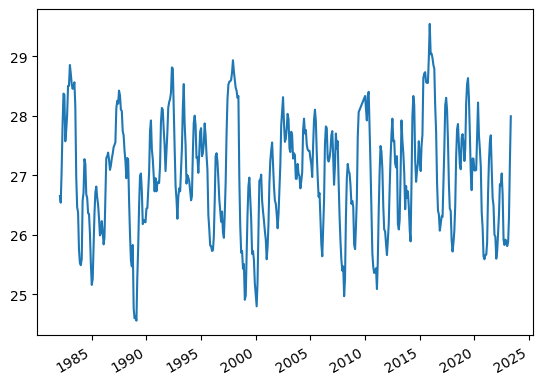

In [17]:
df['Nino 3.4'].plot()

<Axes: >

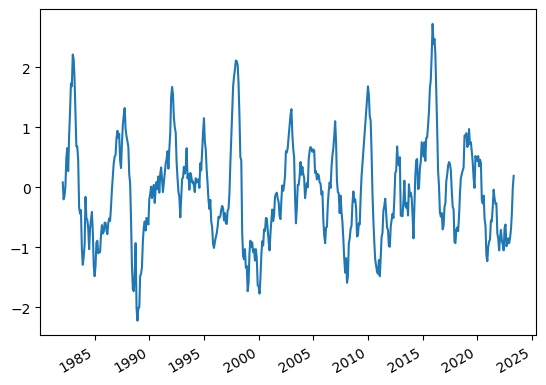

In [18]:
df['Anom 3.4'].plot()

<Axes: >

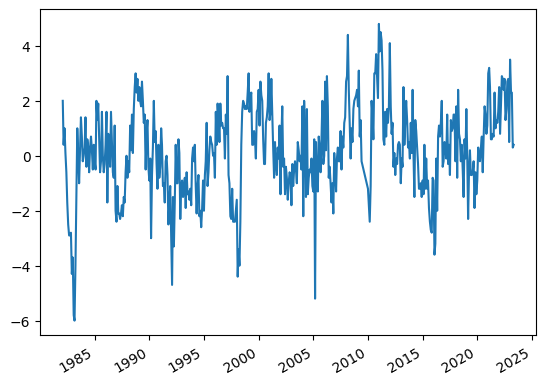

In [19]:
df['soi'].plot()

<Axes: >

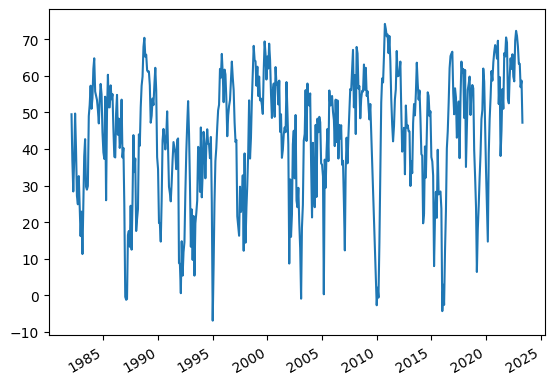

In [20]:
df['olr'].plot()

<Axes: >

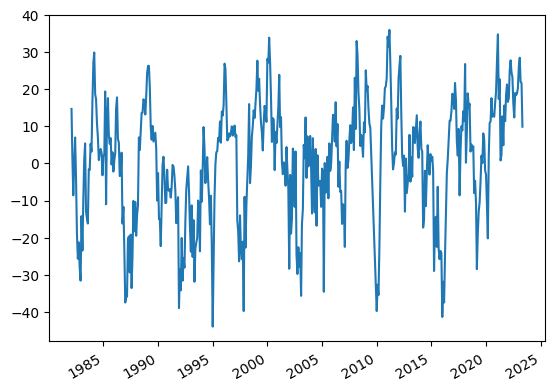

In [21]:
df['anom OLR'].plot()

Algortimo Mapper

In [22]:
%pip install kmapper

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import kmapper as km
from kmapper.jupyter import display
import sklearn
import matplotlib.pyplot as plt

Proyección en la temperatura de la región 3.4

Selecciono solo los datso que nos son relevantes, en este caso sería la temperatura en la región del niño 3.4 y la presión representada por el SOI

In [24]:
data = df[['Nino 3.4', 'soi']].to_numpy()

Implementamos el algoritmo

Cada cluster representa conjuntos que tienen una temperatura y presión similar

In [32]:
data = df.iloc[:,9:11].to_numpy()
mapper = km.KeplerMapper(verbose=1)
projected_data_all = mapper.fit_transform(data, projection=[0])
covering=km.Cover(n_cubes=3,perc_overlap=0.05) 
G = mapper.map(projected_data_all, df, clusterer=sklearn.cluster.KMeans(n_clusters=5),cover=covering)
mapper.visualize(G, 
                title='Performance Data based on temperatures and pressure in the Niño 3.4 region',
                color_values = df['soi'],
                color_function_name = 'SOI',
                node_color_function=np.array(['average','std','sum','max','min']))
                
km.jupyter.display("performance_34" + ".html")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (490, 2)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (490, 13) using lens shaped (490, 1)

Creating 3 hypercubes.

Created 11 edges and 15 nodes in 0:00:00.190117.


c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Wrote visualization to: mapper_visualization_output.html


c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


C:\Users\victo\AppData\Roaming\Python\Python311\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
